In [78]:
import pandas as pd
from io import StringIO  # To simulate reading your document as a CSV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

Data Cleaning

In [57]:
# Simulate loading your dataset (replace this with actual file reading if you have a CSV file)
df = pd.read_csv("Spotify Dataset.csv")

C:\Users\carlo\AppData\Local\Temp\ipykernel_25064\357649020.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Spotify Dataset.csv")


In [58]:
# Replace empty strings with NaN and drop rows with critical missing values
df.replace('', pd.NA, inplace=True)
df.dropna(subset=['popularity'], inplace=True)  # Drop rows where target is missing

In [59]:
df.drop(columns=['Unnamed: 0'], inplace=True,axis=1)

In [ ]:
# Define feature columns (excluding 'popularity' and non-predictive columns like 'track_id')
#feature_cols = [col for col in df.columns if col not in ['popularity', 'track_id','artists','album_name', 'track_name', 'explicit']]
feature_cols = [col for col in df.columns if col not in ['popularity', 'track_id','artists','album_name', 'track_name', 'explicit', 'Artist_MusicBrainzID', 'Artist_LastFMChart', 'Artist_Facebook', 'twitter_link', 'spotify_link','deezer_link',	'itunes_link','tidal_link', 'youtube_link', 'instagram_link','facebook_link']]
X = df[feature_cols]
y = df['popularity']

In [ ]:
# Handle categorical variables with Label Encoding
#categorical_cols = ['track_genre']

#Isnt mode technically categporical too? its binary right?
categorical_cols = ['track_genre', 'record_label', 'Artist_Style', 'Artist_Genre', 'Artist_Mood', 'Artist_Gender', 'Artist_Twitter?','TikTok_Popular']
label_encoders = {}
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = X[col].fillna('Unknown')  # Fill missing categorical values
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

C:\Users\carlo\AppData\Local\Temp\ipykernel_25064\1872322013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna('Unknown')  # Fill missing categorical values
C:\Users\carlo\AppData\Local\Temp\ipykernel_25064\1872322013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [62]:
# Handle numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())  # Fill missing with median

C:\Users\carlo\AppData\Local\Temp\ipykernel_25064\3826953915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())  # Fill missing with median


In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
84744,293960,0.640,0.59300,9,-10.663,0,0.0396,0.3960,0.024700,0.0599,0.5280,97.404,4,84
89295,147133,0.835,0.71800,7,-5.620,0,0.0694,0.2260,0.000002,0.1080,0.4270,92.028,4,89
66688,98386,0.786,0.22500,9,-16.516,1,0.5730,0.6790,0.000000,0.2010,0.6580,110.066,4,66
51391,232173,0.709,0.82900,0,-5.817,1,0.2450,0.0698,0.000000,0.5610,0.6540,137.954,4,51
95123,360320,0.786,0.70200,0,-6.742,1,0.0456,0.5110,0.000000,0.1200,0.6960,104.030,4,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,162613,0.554,0.00763,4,-30.566,1,0.0502,0.9150,0.000970,0.2210,0.1560,119.502,4,76
110268,240062,0.689,0.55400,9,-8.200,1,0.0759,0.0910,0.914000,0.0867,0.1630,148.002,4,110
103694,136306,0.629,0.56000,0,-11.455,0,0.0523,0.5950,0.000000,0.1820,0.8800,118.895,3,103
860,216841,0.421,0.10700,6,-15.191,1,0.0335,0.9480,0.000000,0.0881,0.1180,104.218,4,0


Random Forest

In [68]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=50)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=50)

In [69]:
# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 237.37657079364666
R² Score: 0.5189751459906193


In [70]:
# Feature importance (optional, to see which features matter most)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             feature  importance
13       track_genre    0.202606
7       acousticness    0.086111
0        duration_ms    0.083623
1       danceability    0.080806
10           valence    0.077770
4           loudness    0.076789
6        speechiness    0.076510
11             tempo    0.075433
2             energy    0.072496
9           liveness    0.065889
8   instrumentalness    0.057020
3                key    0.032599
5               mode    0.007257
12    time_signature    0.005093


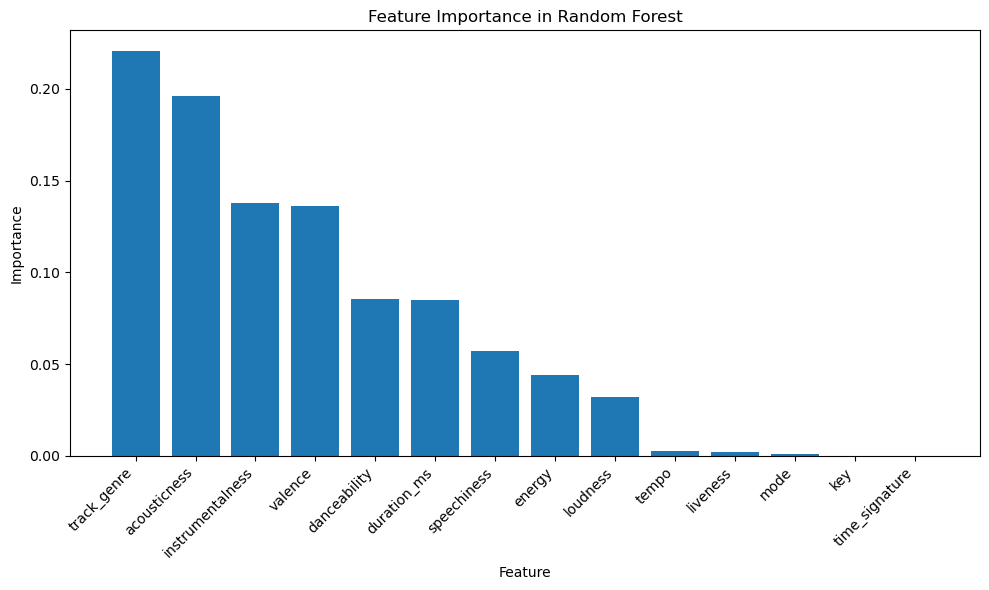

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

MSE: 400.33813321153093
R²: 0.1887464232943633


In [72]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale features (SVR is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

MSE: 449.0926914668526
R²: 0.08994916546623044


MLPRegressor

In [74]:


from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Scale features (neural networks benefit from normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

MSE: 403.44091575641005
R²: 0.18245887976939268


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Scale features (KNN is distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

MSE: 407.0688192982456
R²: 0.1751072200595193


Adaboost

In [76]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

base_estimator = DecisionTreeRegressor(max_depth=3)  # Weak learner
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Feature importance (optional)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 473.3868489277515
R² Score: 0.040718976038358945

Feature Importance:
             feature  importance
13       track_genre    0.220796
7       acousticness    0.195885
8   instrumentalness    0.137995
10           valence    0.136222
1       danceability    0.085490
0        duration_ms    0.084700
6        speechiness    0.057298
2             energy    0.043890
4           loudness    0.031863
11             tempo    0.002600
9           liveness    0.002320
5               mode    0.000943
3                key    0.000000
12    time_signature    0.000000
